# Simple Plant Disease Detection using CNN

A beginner-friendly implementation of plant disease classification

## Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Step 2: Set Dataset Path

In [2]:
from google.colab import drive
drive.mount('/content/drive')
print(" Google Drive mounted successfully!")

Mounted at /content/drive
 Google Drive mounted successfully!


In [3]:
import os
import shutil

google_drive_zip_path = '/content/drive/MyDrive/DL_Assignments/Dataset.zip'

local_zip_path = '/content/Dataset.zip'

if os.path.exists(google_drive_zip_path):
    print(f"Copying {google_drive_zip_path} to {local_zip_path}...")
    shutil.copyfile(google_drive_zip_path, local_zip_path)
    print("Dataset.zip copied to Colab environment!")
else:
    print(f"'{google_drive_zip_path}' not found in Google Drive. Please verify the path.")

Copying /content/drive/MyDrive/DL_Assignments/Dataset.zip to /content/Dataset.zip...
Dataset.zip copied to Colab environment!


In [4]:
import zipfile
import os

zip_path = '/content/Dataset.zip'
extract_path = '/content/Dataset'

if os.path.exists(zip_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Dataset unzipped to {extract_path}")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_path}' is not a valid zip file. Please ensure you have uploaded a correct and uncorrupted zip archive.")
        print("Please re-upload the dataset as a valid .zip file to your Google Drive and update the `google_drive_zip_path` accordingly.")
    except Exception as e:
        print(f"An unexpected error occurred during unzipping: {e}")
else:
    print(f"{zip_path} not found! Please ensure you have copied the dataset file from Google Drive.")

Dataset unzipped to /content/Dataset


## Step 2: Set Dataset Path (Updated from Google Drive)

In [5]:

dataset_path = '/content/Dataset'

# Check if dataset exists
if os.path.exists(dataset_path):
    print(f"Dataset found at: {dataset_path}")
    classes = os.listdir(dataset_path)
    print(f"Number of classes: {len(classes)}")
else:
    print(" Dataset not found!")

Dataset found at: /content/Dataset
Number of classes: 1


## Step 2: Set Dataset Path (Updated)

## Step 3: Set Simple Parameters

In [6]:
# Simple parameters
IMG_SIZE = 128        # Image size (128x128 pixels)
BATCH_SIZE = 32       # Number of images per batch
EPOCHS = 20           # Number of training rounds

print(f"Image Size: {IMG_SIZE}x{IMG_SIZE}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")

Image Size: 128x128
Batch Size: 32
Epochs: 20


To inspect your dataset structure and confirm the presence of multiple classes, you can run the following code:

### Fixing Nested Dataset Structure

It appears your dataset is structured like `/content/Dataset/Dataset/class1`, `/content/Dataset/Dataset/class2`, etc. For `ImageDataGenerator` to correctly identify multiple classes, the class folders (e.g., `class1`, `class2`) should be directly inside `/content/Dataset/`.

The following code will move the contents of the inner 'Dataset' folder up one level.

In [7]:
import os
import shutil

source_path = '/content/Dataset/Dataset'
destination_path = '/content/Dataset'

if os.path.exists(source_path):
    # Move all contents from the nested 'Dataset' folder to the parent 'Dataset' folder
    for item in os.listdir(source_path):
        shutil.move(os.path.join(source_path, item), destination_path)
    # Remove the now empty nested 'Dataset' folder
    os.rmdir(source_path)
    print(f"Flattened dataset structure. Contents moved from {source_path} to {destination_path}")
else:
    print(f" Nested directory '{source_path}' not found. Dataset structure may already be flat or different.")

# Re-check the dataset structure after flattening
print(f"\nContents of {destination_path} after flattening:")
if os.path.exists(destination_path):
    items = os.listdir(destination_path)
    if not items:
        print("  (Directory is empty)")
    else:
        for item in items:
            path = os.path.join(destination_path, item)
            if os.path.isdir(path):
                print(f"  [DIR] {item}/ (contains {len(os.listdir(path))} items)")
            else:
                print(f"  [FILE] {item}")
else:
    print(f" Directory '{destination_path}' not found.")


Flattened dataset structure. Contents moved from /content/Dataset/Dataset to /content/Dataset

Contents of /content/Dataset after flattening:
  [DIR] Tomato_Leaf_Mold/ (contains 952 items)
  [DIR] Tomato__Tomato_mosaic_virus/ (contains 373 items)
  [DIR] Tomato_Bacterial_spot/ (contains 2127 items)
  [DIR] Tomato__Target_Spot/ (contains 1404 items)
  [DIR] Apple___Apple_scab/ (contains 2016 items)
  [DIR] Tomato_Septoria_leaf_spot/ (contains 1771 items)
  [DIR] Tomato__Tomato_YellowLeaf__Curl_Virus/ (contains 3209 items)
  [DIR] Corn_(maize)___Northern_Leaf_Blight/ (contains 1908 items)
  [DIR] Potato___Early_blight/ (contains 1000 items)
  [DIR] Tomato_Early_blight/ (contains 1000 items)
  [DIR] Apple___Black_rot/ (contains 1987 items)
  [DIR] Potato___healthy/ (contains 152 items)
  [DIR] Tomato_Spider_mites_Two_spotted_spider_mite/ (contains 1676 items)
  [DIR] Tomato_healthy/ (contains 1591 items)
  [DIR] Apple___Cedar_apple_rust/ (contains 1760 items)
  [DIR] Potato___Late_blight/

Now that the dataset structure is corrected, we need to re-run the data preparation, model building, and training steps. This will ensure that `ImageDataGenerator` correctly identifies all your classes.

## Step 4: Prepare Data (Re-run)

In [13]:
# Enhanced data generator with augmentation
# Enhanced data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,           # Rotate images randomly
    width_shift_range=0.2,       # Shift horizontally
    height_shift_range=0.2,      # Shift vertically
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Zoom in/out
    horizontal_flip=True,        # Flip images
    fill_mode='nearest'
)

# Validation data - only rescaling (no augmentation)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation data
val_data = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 28589 images belonging to 23 classes.
Found 7136 images belonging to 23 classes.


## Step 5: Build Simple CNN Model (Re-run)

In [14]:
# Number of disease classes
num_classes = len(train_data.class_indices)

# Create a simple CNN model
model = Sequential([
    # Layer 1: Find patterns in images
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    # Layer 2: Find more complex patterns
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Layer 3: Even more complex patterns
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten the data
    Flatten(),

    # Dense layers for classification
    Dense(128, activation='relu'),
    Dropout(0.5),                    # Prevent overfitting
    Dense(num_classes, activation='softmax')  # Output layer
])

print(" Model created!")
model.summary()

 Model created!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 23)             │         2,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,307,607 (12.62 MB)

 Trainable params: 3,307,607 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

## Step 6: Compile Model (Re-run)

In [15]:
# Compile the model
model.compile(
    optimizer='adam',                    # Optimization algorithm
    loss='categorical_crossentropy',     # Loss function
    metrics=['accuracy']                 # Track accuracy
)

print(" Model compiled!")

 Model compiled!


## Step 7: Train the Model (Re-run)

In [16]:
# Train the model
print(" Starting training...\n")

history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

print("\n Training completed!")

 Starting training...

Epoch 1/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 147s 161ms/step - accuracy: 0.2640 - loss: 2.4800 - val_accuracy: 0.5921 - val_loss: 1.3267
Epoch 2/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 145s 162ms/step - accuracy: 0.5390 - loss: 1.4572 - val_accuracy: 0.6516 - val_loss: 1.1021
Epoch 3/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 145s 162ms/step - accuracy: 0.6114 - loss: 1.1997 - val_accuracy: 0.6394 - val_loss: 1.1422
Epoch 4/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 143s 160ms/step - accuracy: 0.6654 - loss: 1.0237 - val_accuracy: 0.7401 - val_loss: 0.8296
Epoch 5/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 141s 158ms/step - accuracy: 0.7078 - loss: 0.8991 - val_accuracy: 0.7193 - val_loss: 0.9098
Epoch 6/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 140s 156ms/step - accuracy: 0.7209 - loss: 0.8416 - val_accuracy: 0.7892 - val_loss: 0.6342
Epoch 7/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 142s 159ms/step - accuracy: 0.7520 - loss: 0.7422 - val_accuracy: 0.8073 - val_loss: 0.6146
Epoch 8/20
894/894 ━━━━━━━━━━━━━━━━━━━━ 144s 161ms/st

## Step 8: Plot Training Results

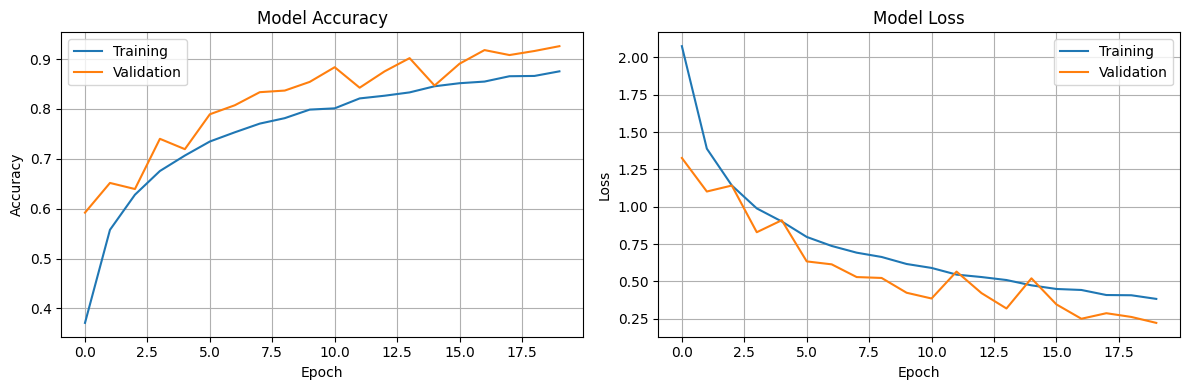


 Final Validation Accuracy: 92.57%


In [17]:
# Plot accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print final accuracy
final_acc = history.history['val_accuracy'][-1] * 100
print(f"\n Final Validation Accuracy: {final_acc:.2f}%")

## Step 9: Evaluate Model

In [18]:
# Evaluate on validation data
loss, accuracy = model.evaluate(val_data)

print(f"\n{'='*50}")
print(f"Validation Accuracy: {accuracy*100:.2f}%")
print(f"Validation Loss: {loss:.4f}")
print(f"{'='*50}")

223/223 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.9249 - loss: 0.2280

Validation Accuracy: 92.57%
Validation Loss: 0.2226


## Step 10: Save the Model

In [19]:
# Save the trained model
model.save('simple_plant_disease_model.h5')
print(" Model saved as 'simple_plant_disease_model.h5'")

 Model saved as 'simple_plant_disease_model.h5'


## Step 11: Test Prediction on Sample Image

In [20]:
from tensorflow.keras.preprocessing import image

# Get class names
class_names = list(train_data.class_indices.keys())

# Function to predict disease
def predict_disease(img_path):
    # Load image
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Scale
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions) * 100

    # Display
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

print(" Prediction function ready!")
print("\nTo test: predict_disease('path/to/your/image.jpg')")

 Prediction function ready!

To test: predict_disease('path/to/your/image.jpg')


## Step 12: Example Prediction

Testing image from: Tomato__Tomato_mosaic_virus

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


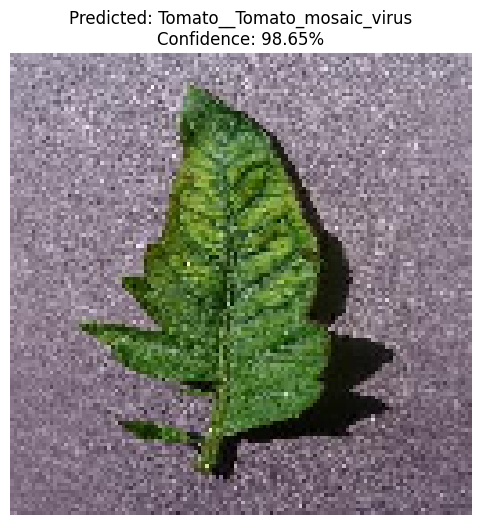


Actual: Tomato__Tomato_mosaic_virus
Predicted: Tomato__Tomato_mosaic_virus
Match:  Correct!


In [22]:
# Test on a random image from dataset
random_class = np.random.choice(class_names)
class_folder = os.path.join(dataset_path, random_class)
random_image = np.random.choice(os.listdir(class_folder))
test_path = os.path.join(class_folder, random_image)

print(f"Testing image from: {random_class}\n")
predicted, conf = predict_disease(test_path)
print(f"\nActual: {random_class}")
print(f"Predicted: {predicted}")
print(f"Match: {' Correct!' if random_class == predicted else 'Incorrect'}")